In [1]:
import matplotlib.pyplot as pl
import numpy as np
import skope
% matplotlib inline

/anaconda3/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
star = skope.Target()

In [3]:
fpix, flux, ferr= star.GenerateLightCurve(12.,roll=1.,background_level=100., ncadences=1000)

100%|██████████| 1000/1000 [00:36<00:00, 27.27it/s]


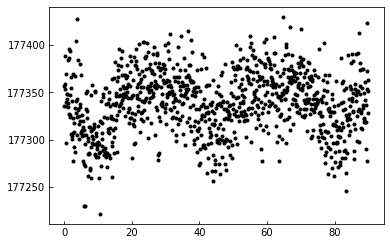

In [4]:
pl.plot(star.t,flux, 'k.')

In [5]:
ap = star.Aperture(fpix)

In [6]:
ap

array([[ 0.044,  0.507,  0.757,  0.768,  0.641,  0.269,    nan],
       [ 0.601,  0.994,  1.   ,  1.   ,  1.   ,  0.898,  0.31 ],
       [ 0.92 ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.714],
       [ 0.994,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.916],
       [ 0.991,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.914],
       [ 0.813,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.713],
       [ 0.353,  0.829,  1.   ,  1.   ,  1.   ,  0.837,  0.333]])

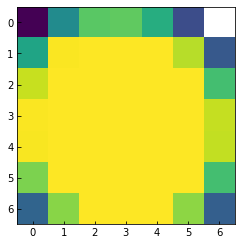

In [7]:
pl.imshow(ap)

In [8]:
det, detflux = star.Detrend(fpix)

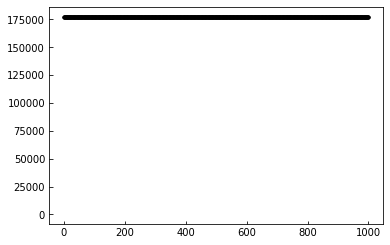

In [10]:
pl.plot(star.transit*np.mean(detflux),'r')
pl.plot(det,'k.')

In [11]:
fpix, flux = star.AddTransit(fpix)

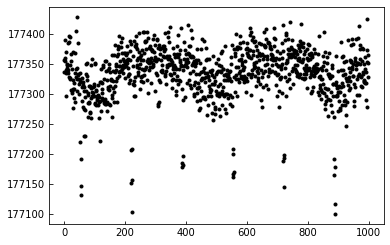

In [12]:
pl.plot(flux,'k.')

In [13]:
fpix, flux, ferr= star.GenerateLightCurve(11.,roll=5., background_level=100., apsize = 9)

100%|██████████| 1000/1000 [01:02<00:00, 15.95it/s]


In [14]:
ap = star.Aperture(fpix)

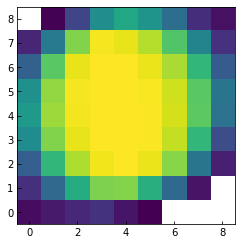

In [15]:
pl.imshow(ap,origin='lower')

In [16]:
det, raw = star.Detrend(fpix)

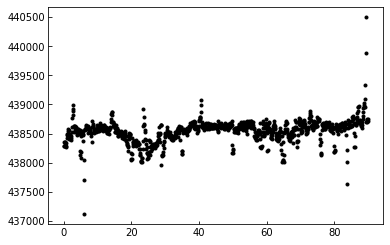

In [17]:
# pl.plot(star.t, raw, 'r.', alpha = 0.5)
pl.plot(star.t, det, 'k.')

In [18]:
trn, trnflux = star.AddTransit(fpix)

In [19]:
dettr, rawtr = star.Detrend(trn)

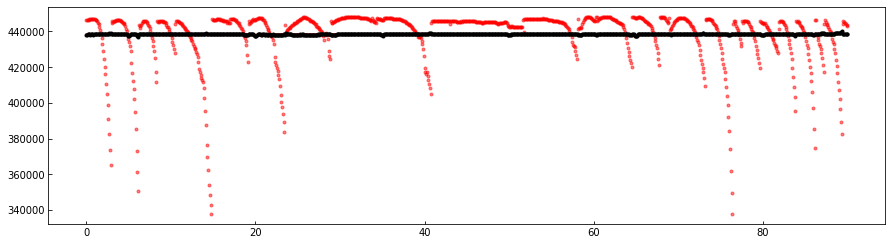

In [20]:
fig = pl.figure(figsize=(15,4))
pl.plot(star.t, rawtr, 'r.', alpha = 0.5)
pl.plot(star.t, star.trn*np.mean(dettr),'r')
pl.plot(star.t, dettr, 'k.')